In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Load bergingspercentages deelgebied
df = pd.read_parquet("data/bergingspercentage_rucphen_parquet/RUC0011_WTH_RIO.Bergingspercentage.parquet")
df_metadata = pd.read_parquet("data/bergingspercentage_rucphen_parquet/RUC0011_WTH_RIO.Bergingspercentage.metadata.parquet")

# Checks if df has nan values (THERE SHOULDN'T BE ANY)
print(f"- NaN values:\n{df.isna().sum()}")

print(f"- df:\n{df}")

- NaN values:
Date            0
Time            0
Value [m³/h]    0
dtype: int64
- df:
              Date      Time  Value [m³/h]
0       01-01-2018  00:00:00       100.000
1       01-01-2018  00:05:00       100.000
2       01-01-2018  00:10:00       100.000
3       01-01-2018  00:15:00       100.000
4       01-01-2018  00:20:00       100.000
...            ...       ...           ...
616040  10-11-2023  00:40:00         0.814
616041  10-11-2023  00:45:00         1.106
616042  10-11-2023  00:50:00         1.399
616043  10-11-2023  00:55:00         1.692
616044  10-11-2023  01:00:00         1.985

[616045 rows x 3 columns]


In [2]:
df_metadata.head(15)

,Key,Value
0,Station Site,Kenbelstraat
1,Station Name,Niveau Riool
2,Station Number,RUC0011_WTH_RIO
3,LocalX,99486
4,LocalY,396923
6,Parameter Name,Bergingspercentage
7,Parameter Type,WNS12107
8,Parameter Type Name,WATHTE [%] [PLAATSLR] [AW]
9,Time series Name,ContinueBerekening.F
10,Time series Unit,m³/h


In [3]:
# Data cleaning/preperation
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d-%m-%Y %H:%M:%S")
df.drop(columns= 'Date', inplace= True)

# Rename columns
df = df.rename(columns={'Value [m³/h]': 'percentage'})

# Define the desired order of columns
desired_order = ['timestamp', 'percentage']

# Reorder columns using reorder_levels
df = df[desired_order]
print(f"- df:\n{df}")

- df:
                 timestamp  percentage
0      2018-01-01 00:00:00     100.000
1      2018-01-01 00:05:00     100.000
2      2018-01-01 00:10:00     100.000
3      2018-01-01 00:15:00     100.000
4      2018-01-01 00:20:00     100.000
...                    ...         ...
616040 2023-11-10 00:40:00       0.814
616041 2023-11-10 00:45:00       1.106
616042 2023-11-10 00:50:00       1.399
616043 2023-11-10 00:55:00       1.692
616044 2023-11-10 01:00:00       1.985

[616045 rows x 2 columns]


In [4]:
# Checks for duplicates in timestamp (THERE SHOULDN'T BE ANY)
print(f"- Duplicates:\n{df[df.duplicated(['timestamp'])]}")

- Duplicates:
Empty DataFrame
Columns: [timestamp, percentage]
Index: []


In [5]:
# Checks if timestamp exists in timestamp column of data frame
def check_timestamps(df, start_date, end_date):
    delta = pd.Timedelta(minutes=5)

    all_timestamps = pd.date_range(start=start_date, end=end_date, freq=delta)

    # Convert df['timestamp'] to a datetime if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Find timestamps that are not in df['timestamp']
    missing_timestamps = all_timestamps[~all_timestamps.isin(df['timestamp'])]

    # Print missing timestamps
    print("- Number of missing timestamps:", len(missing_timestamps))
    for timestamp in missing_timestamps:
        print(timestamp)

In [6]:
# Checks gaps for df
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2023-11-10 01:00:00')

check_timestamps(df, start_date, end_date)

- Number of missing timestamps: 0


In [7]:
# Checks the minimum and maximum values of the percentage column
print("- Min:", df["percentage"].min())
print("- Max:", df["percentage"].max())

- Min: 0.0
- Max: 100.0


c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

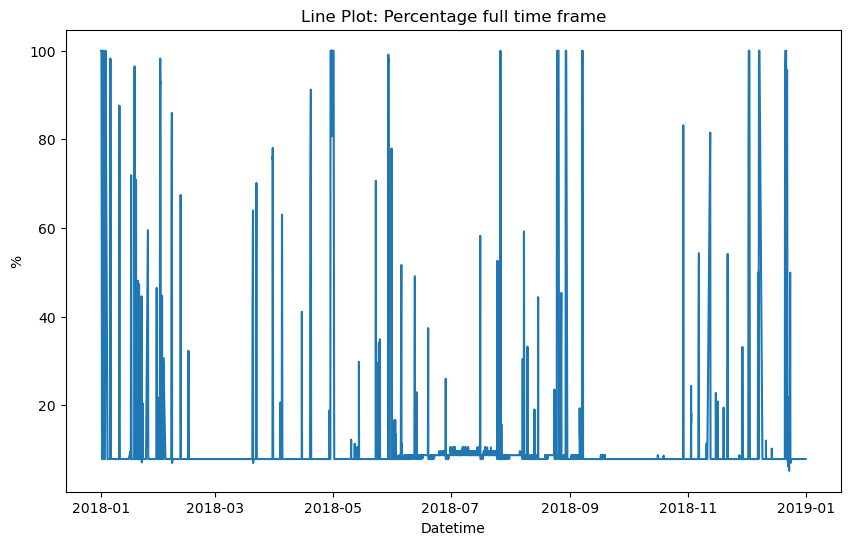

c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

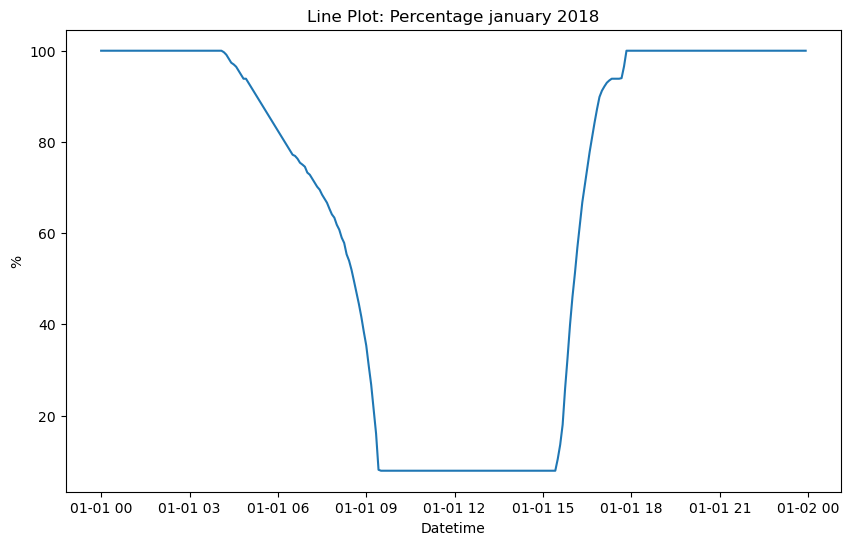

In [8]:
# Visualizes the percentage column
def create_plot(df, x,xlabel, y, ylabel, title):
    # Create a line plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x = x, y = y)

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot
    plt.show()

df_2018 = df[df['timestamp'].dt.year == 2018]
df_jan_2018 = df[(df['timestamp'].dt.year == 2018) & (df['timestamp'].dt.month == 1) & (df['timestamp'].dt.day == 1)]

create_plot(df_2018, 'timestamp','Datetime', 'percentage','%', 'Line Plot: Percentage full time frame')
create_plot(df_jan_2018, 'timestamp','Datetime', 'percentage','%', 'Line Plot: Percentage january 2018')


In [9]:
# Imports the weather data
df_weather = pd.read_parquet("try_map/polygon_1663.parquet")
df_weather.sort_values(by=['timestamp'], inplace=True)
df_weather['precipitation'] = df_weather['precipitation'].apply(lambda x: 0 if x < 0 else x)

# Checks if df_weather has nan values (THERE SHOULDN'T BE ANY)
print(f"- NaN values:\n{df_weather.isna().sum()}")

# Checks if df_weather has duplicate timestamps (THERE SHOULDN'T BE ANY)
print(f"- Duplicates:\n{df_weather[df_weather.duplicated(['timestamp'])]}")

print(f"- df_weather\n{df_weather}")

- NaN values:
timestamp        0
precipitation    0
dtype: int64
- Duplicates:
Empty DataFrame
Columns: [timestamp, precipitation]
Index: []
- df_weather
                 timestamp  precipitation
0      2019-01-01 00:00:00       0.000000
1      2019-01-01 00:05:00       0.000000
2      2019-01-01 00:10:00       0.000000
3      2019-01-01 00:15:00       0.000000
4      2019-01-01 00:20:00       0.000000
...                    ...            ...
676924 2023-12-11 08:30:00       0.020020
676925 2023-12-11 08:35:00       0.039978
676926 2023-12-11 08:40:00       0.020020
676927 2023-12-11 08:45:00       0.000000
676928 2023-12-11 08:50:00       0.000000

[516646 rows x 2 columns]


In [10]:
print(f"- Max:\n{df_weather.max()}")
print(f"- Min:\n{df_weather.min()}")

- Max:
timestamp        2023-12-11 08:50:00
precipitation               7.170013
dtype: object
- Min:
timestamp        2019-01-01 00:00:00
precipitation                    0.0
dtype: object


In [11]:
# Checks gaps for df_weather
start_date = pd.to_datetime('2019-01-01 00:00:00')
end_date = pd.to_datetime('2023-12-11 08:50:00')

check_timestamps(df_weather, start_date, end_date)

- Number of missing timestamps: 3301
2019-01-01 13:20:00
2019-01-02 04:25:00
2019-01-02 16:55:00
2019-01-02 18:00:00
2019-01-02 19:50:00
2019-01-03 11:00:00
2019-01-04 00:00:00
2019-01-04 03:25:00
2019-01-05 04:55:00
2019-01-08 04:15:00
2019-01-09 02:10:00
2019-01-10 11:00:00
2019-01-10 23:05:00
2019-01-11 20:00:00
2019-01-11 20:20:00
2019-01-11 20:45:00
2019-01-11 22:05:00
2019-01-12 06:30:00
2019-01-12 10:30:00
2019-01-12 11:15:00
2019-01-12 12:05:00
2019-01-12 12:15:00
2019-01-12 12:30:00
2019-01-12 12:35:00
2019-01-12 12:50:00
2019-01-12 14:10:00
2019-01-12 14:15:00
2019-01-12 14:25:00
2019-01-12 14:35:00
2019-01-12 14:40:00
2019-01-12 15:25:00
2019-01-12 15:35:00
2019-01-12 15:50:00
2019-01-12 16:05:00
2019-01-12 16:35:00
2019-01-12 16:55:00
2019-01-12 17:05:00
2019-01-12 17:25:00
2019-01-12 20:35:00
2019-01-12 20:40:00
2019-01-12 21:10:00
2019-01-12 21:25:00
2019-01-12 22:20:00
2019-01-13 01:25:00
2019-01-13 03:30:00
2019-01-13 04:50:00
2019-01-13 06:20:00
2019-01-13 23:10:00
201

In [12]:
# Joins the weather data with the percentage data
merged_df = pd.merge(df_weather, df, on='timestamp', how='inner')

# Checks if merged_df has duplicate timestamps (THERE SHOULDN'T BE ANY)
print(f"- Duplicates:\n{merged_df[merged_df.duplicated(['timestamp'])]}")

print(f"- merged_df\n{merged_df}")

- Duplicates:
Empty DataFrame
Columns: [timestamp, precipitation, percentage]
Index: []
- merged_df
                 timestamp  precipitation  percentage
0      2019-01-01 00:00:00            0.0       7.895
1      2019-01-01 00:05:00            0.0       7.895
2      2019-01-01 00:10:00            0.0       7.895
3      2019-01-01 00:15:00            0.0       7.895
4      2019-01-01 00:20:00            0.0       7.895
...                    ...            ...         ...
507883 2023-11-10 00:40:00            0.0       0.814
507884 2023-11-10 00:45:00            0.0       1.106
507885 2023-11-10 00:50:00            0.0       1.399
507886 2023-11-10 00:55:00            0.0       1.692
507887 2023-11-10 01:00:00            0.0       1.985

[507888 rows x 3 columns]


In [13]:
# Checks gaps for merged_df
start_date = pd.to_datetime('2019-01-01 00:00:00')
end_date = pd.to_datetime('2023-11-10 01:00:00')

check_timestamps(merged_df, start_date, end_date)

- Number of missing timestamps: 3037
2019-01-01 13:20:00
2019-01-02 04:25:00
2019-01-02 16:55:00
2019-01-02 18:00:00
2019-01-02 19:50:00
2019-01-03 11:00:00
2019-01-04 00:00:00
2019-01-04 03:25:00
2019-01-05 04:55:00
2019-01-08 04:15:00
2019-01-09 02:10:00
2019-01-10 11:00:00
2019-01-10 23:05:00
2019-01-11 20:00:00
2019-01-11 20:20:00
2019-01-11 20:45:00
2019-01-11 22:05:00
2019-01-12 06:30:00
2019-01-12 10:30:00
2019-01-12 11:15:00
2019-01-12 12:05:00
2019-01-12 12:15:00
2019-01-12 12:30:00
2019-01-12 12:35:00
2019-01-12 12:50:00
2019-01-12 14:10:00
2019-01-12 14:15:00
2019-01-12 14:25:00
2019-01-12 14:35:00
2019-01-12 14:40:00
2019-01-12 15:25:00
2019-01-12 15:35:00
2019-01-12 15:50:00
2019-01-12 16:05:00
2019-01-12 16:35:00
2019-01-12 16:55:00
2019-01-12 17:05:00
2019-01-12 17:25:00
2019-01-12 20:35:00
2019-01-12 20:40:00
2019-01-12 21:10:00
2019-01-12 21:25:00
2019-01-12 22:20:00
2019-01-13 01:25:00
2019-01-13 03:30:00
2019-01-13 04:50:00
2019-01-13 06:20:00
2019-01-13 23:10:00
201

In [14]:
# Checks if merged_df has nan values (THERE SHOULDN'T BE ANY)
print(f"- NaN values:\n{merged_df.isna().sum()}")

- NaN values:
timestamp        0
precipitation    0
percentage       0
dtype: int64


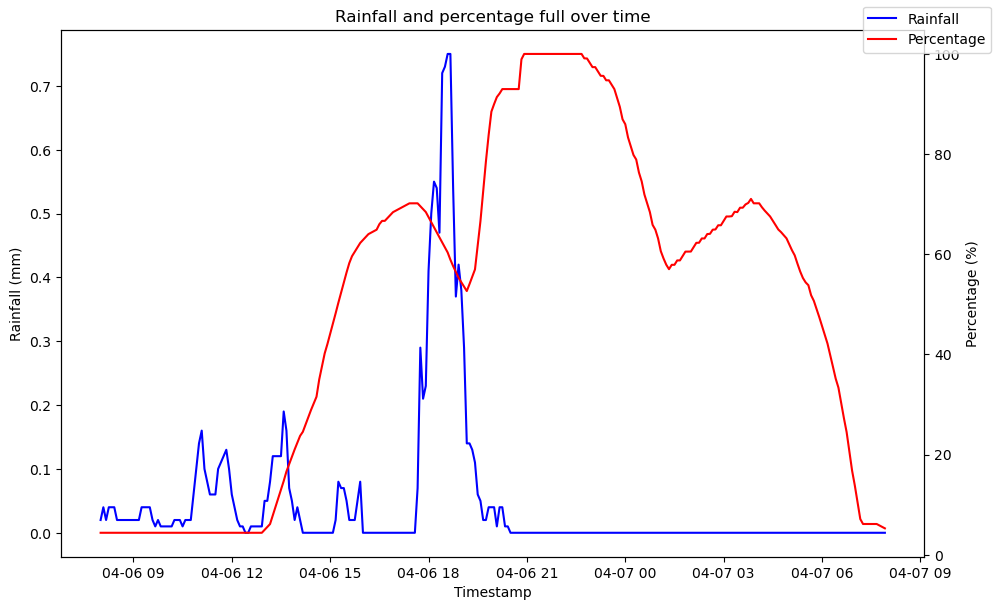

In [15]:
# Visualizes the rainfall and percentage
# Define the start and end timestamps
start_timestamp = pd.to_datetime('2023-04-06 08:00:00')
end_timestamp = pd.to_datetime('2023-04-07 08:00:00')

# Create a boolean mask for the specified time range
mask = (merged_df['timestamp'] >= start_timestamp) & (merged_df['timestamp'] < end_timestamp)

# Apply the mask to get the desired slice of the DataFrame
result_df = merged_df[mask]

# Plot with both lines
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Rainfall (mm)')
ax1.plot(result_df['timestamp'], result_df['precipitation'], color='blue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage (%)')
ax2.plot(result_df['timestamp'], result_df['percentage'], color='red')
ax2.tick_params(axis='y')

fig.legend(['Rainfall', 'Percentage'], loc='upper right')

fig.tight_layout()

plt.title('Rainfall and percentage full over time')
plt.show()

In [16]:
# save merged_df to parquet
merged_df.to_parquet("data/cleaned_data/merged_df.parquet")

# # save merged_df to excel
# merged_df.to_excel("data/cleaned_data/merged_df.xlsx")

# # save merged_df to csv
# merged_df.to_csv("data/cleaned_data/merged_df.csv")